<a href="https://colab.research.google.com/github/CarlosAg20/cd-Carlos-Agudelo-2023/blob/main/Carlos_Agudelo_Taller_2_Regresiones_lineales_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import pearsonr, zscore

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [16]:
#Datos de propiedades
ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [41]:
df.dtypes

Rooms              int64
Price            float64
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Lattitude        float64
Longtitude       float64
Propertycount    float64
dtype: object

In [40]:
for x in df:
  x = df.select_dtypes(include=['object'])
  dfm = df.drop(x, axis=1, )
for x in df:
  x = df.select_dtypes(include=['object'])
  df = df.drop(x, axis=1, )

dfm.dtypes

Rooms              int64
Price            float64
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Lattitude        float64
Longtitude       float64
Propertycount    float64
dtype: object

Elimino todas las columnas de tipo objeto

In [19]:

dfm.dtypes

Rooms              int64
Price            float64
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Lattitude        float64
Longtitude       float64
Propertycount    float64
dtype: object

Elimino las columnas que no tendré en cuenta para el análisis según los datos arrojados y teniendo en cuenta las correlaciones entre sí.

In [63]:
#dfm = dfm.drop(columns= ['Lattitude', 'Postcode', 'Longtitude', 'Bedroom2', 'Bathroom', 'Landsize', 'Propertycount', 'Car', 'Distance'])
#dfm.dtypes

df = df.drop(columns= ['Lattitude', 'Postcode', 'Longtitude', 'Bedroom2'])

df

#df0 = df[df["BuildingArea"]<=800]
#df0

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
1,2,1035000.0,2.5,1.0,0.0,156.0,79.0,1900.0,4019.0
2,3,1465000.0,2.5,2.0,0.0,134.0,150.0,1900.0,4019.0
4,4,1600000.0,2.5,1.0,2.0,120.0,142.0,2014.0,4019.0
6,3,1876000.0,2.5,2.0,0.0,245.0,210.0,1910.0,4019.0
7,2,1636000.0,2.5,1.0,2.0,256.0,107.0,1890.0,4019.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,1.0,1.0,210.0,79.0,2006.0,2329.0
13573,4,635000.0,14.7,2.0,1.0,662.0,172.0,1980.0,16166.0
13576,3,1031000.0,6.8,2.0,2.0,333.0,133.0,1995.0,6380.0
13578,4,2500000.0,6.8,1.0,5.0,866.0,157.0,1920.0,6380.0


In [43]:
#Buscar nulos
dfm.isnull().sum()

df.isnull().sum()

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

In [ ]:
df

In [45]:
#Borrado de datos nulos
dfm = dfm.dropna()

df = dfm.dropna()
dfm

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


<Axes: >

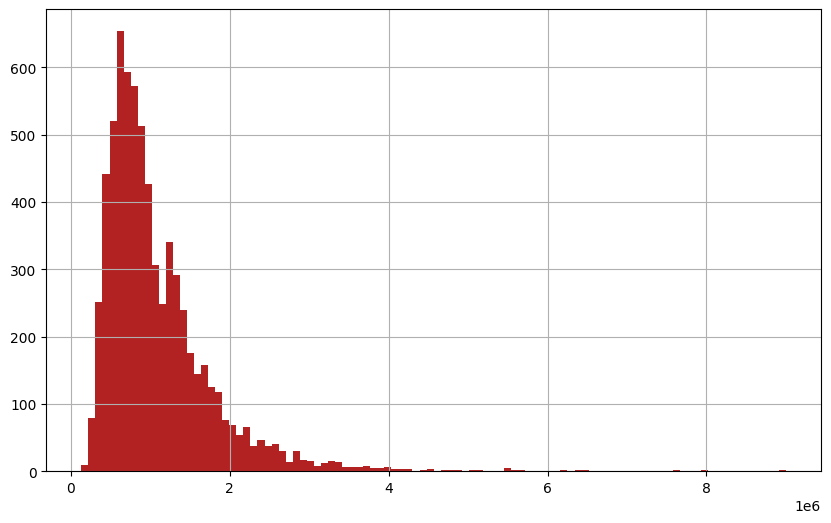

In [23]:
#Histograma
dfm.Price.hist(color='firebrick', bins=100, figsize=(10, 6))

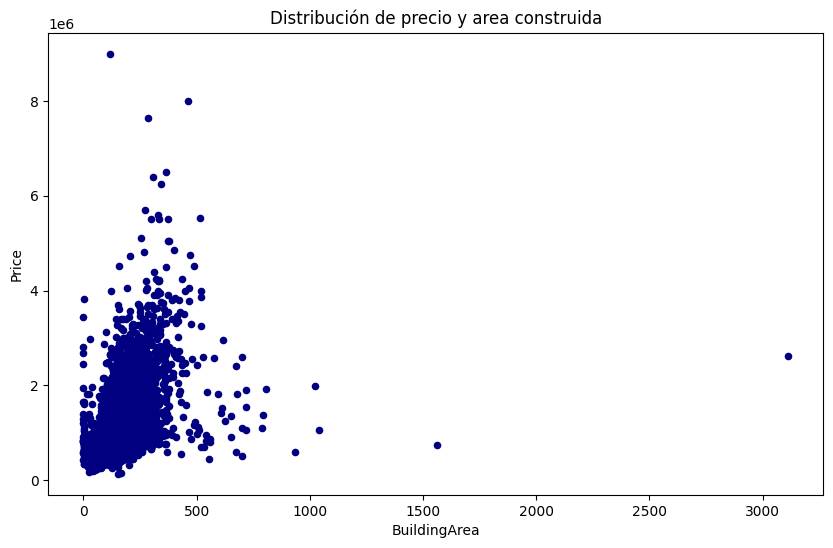

In [24]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
dfm.plot(x = 'BuildingArea', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

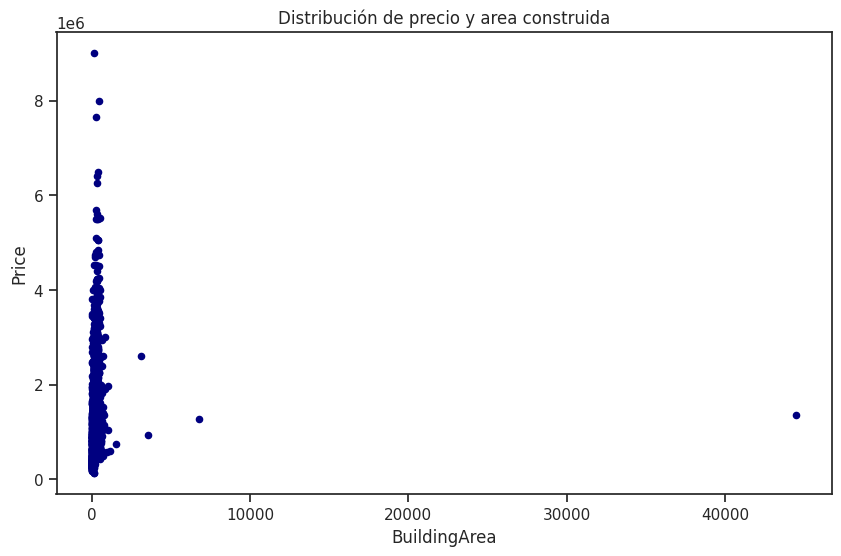

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x = 'BuildingArea', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

In [46]:
#Datos con área menor o igual a 800
dfm = dfm[dfm["BuildingArea"]<=800]

df = df[df["BuildingArea"]<=800]
dfm

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


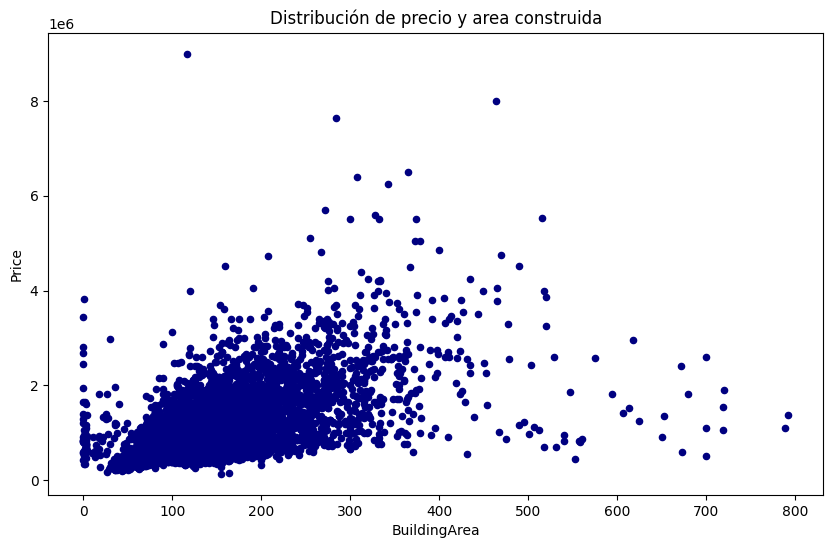

In [26]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
dfm.plot(x = 'BuildingArea', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

In [47]:
#Datos con área cero
dfzero = dfm[dfm["BuildingArea"]<5]
len(dfzero)

dfzero = df[df["BuildingArea"]<5]
len(dfzero)

51

In [48]:
#Se eliminan los registros de menos de 15 mts cuadrados de area
dfm = dfm[dfm["BuildingArea"]>=5]

df = df[df["BuildingArea"]>=5]
dfm

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


In [49]:
#Se eliminan todos los datos que estén más allá de 3 desviaciones estándar
dfm = dfm[(np.abs(zscore(dfm['BuildingArea']))<=3)]

df = df[(np.abs(zscore(df['BuildingArea']))<=3)]
dfm

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


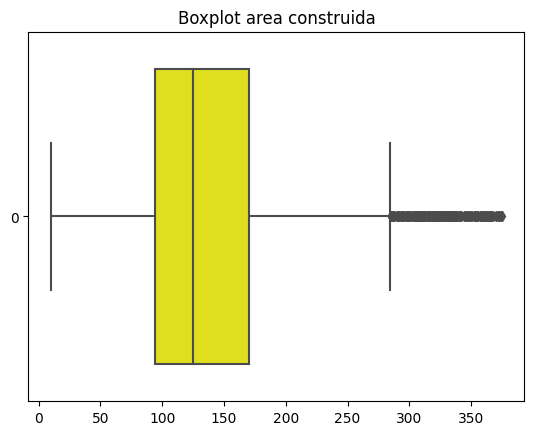

In [30]:
#Boxplot
ax = sb.boxplot(data=dfm['BuildingArea'].values, orient='h', color='yellow')
ax.set_title('Boxplot area construida');
plt.show()

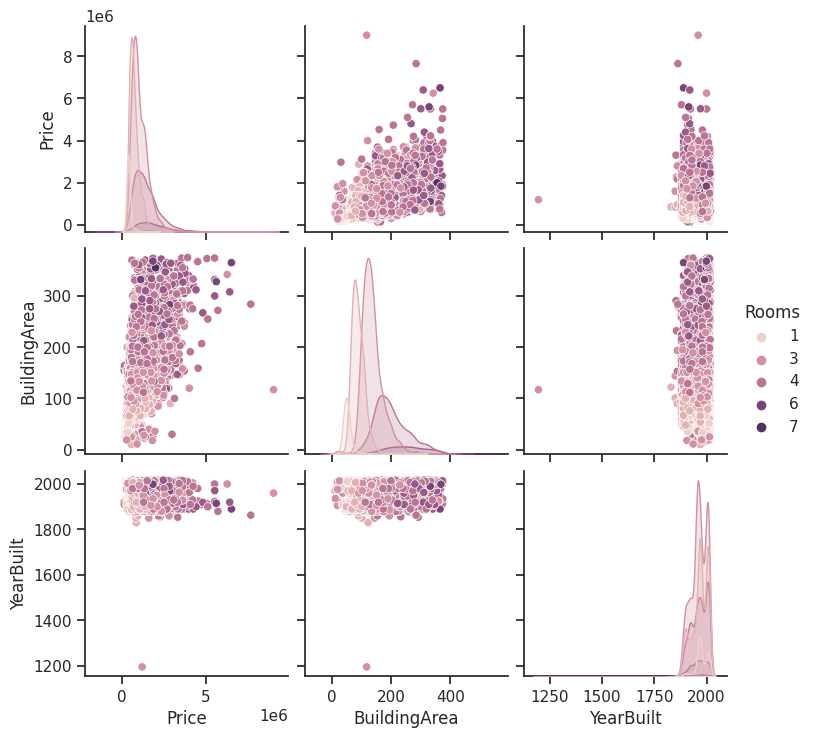

In [31]:
#Múltiples diagramas por parejas
sb.set_theme(style="ticks")
sb.pairplot(dfm, hue='Rooms')

In [32]:
#Correlación entre variables
corr_test = pearsonr(x = dfm['BuildingArea'], y = dfm['Price'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6248929006107207
P-value:  0.0


<Axes: title={'center': 'Pearson Correlation of Features'}>

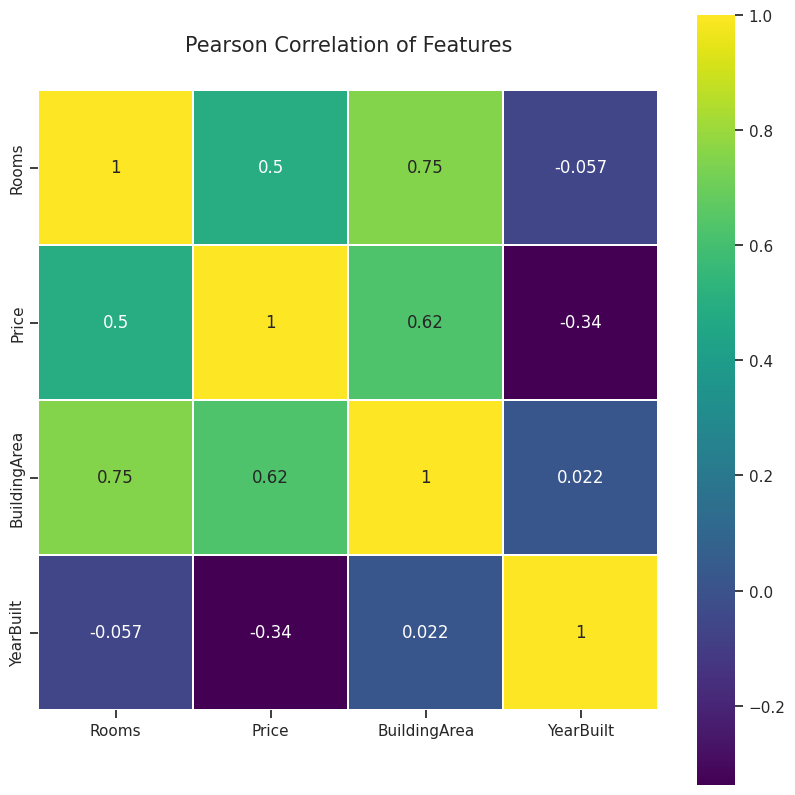

In [33]:
colormap = plt.cm.viridis
plt.figure(figsize=(10, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(dfm.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [34]:
dfm

,Rooms,Price,BuildingArea,YearBuilt
1,2,1035000.0,79.0,1900.0
2,3,1465000.0,150.0,1900.0
4,4,1600000.0,142.0,2014.0
6,3,1876000.0,210.0,1910.0
7,2,1636000.0,107.0,1890.0
...,...,...,...,...
13572,2,650000.0,79.0,2006.0
13573,4,635000.0,172.0,1980.0
13576,3,1031000.0,133.0,1995.0
13578,4,2500000.0,157.0,1920.0


In [50]:
df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


In [35]:
#Regresión lineal (Area construida vs. Precio)
x = dfm.iloc[:,[0,2,3]]
y = dfm["Price"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     2364.
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:28:38   Log-Likelihood:                -96767.
No. Observations:                6706   AIC:                         1.935e+05
Df Residuals:                    6702   BIC:                         1.936e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.189e+07   2.87e+05     41.390   

In [73]:
lista=[1,2,3,4,5,6,7,8]
x=0
for i in lista:
    for j in lista:
      for k in lista:
        if i != j and i != k and j != k :
            x=x+1
            print(i, j, k)
print(x)

1 2 3
1 2 4
1 2 5
1 2 6
1 2 7
1 2 8
1 3 2
1 3 4
1 3 5
1 3 6
1 3 7
1 3 8
1 4 2
1 4 3
1 4 5
1 4 6
1 4 7
1 4 8
1 5 2
1 5 3
1 5 4
1 5 6
1 5 7
1 5 8
1 6 2
1 6 3
1 6 4
1 6 5
1 6 7
1 6 8
1 7 2
1 7 3
1 7 4
1 7 5
1 7 6
1 7 8
1 8 2
1 8 3
1 8 4
1 8 5
1 8 6
1 8 7
2 1 3
2 1 4
2 1 5
2 1 6
2 1 7
2 1 8
2 3 1
2 3 4
2 3 5
2 3 6
2 3 7
2 3 8
2 4 1
2 4 3
2 4 5
2 4 6
2 4 7
2 4 8
2 5 1
2 5 3
2 5 4
2 5 6
2 5 7
2 5 8
2 6 1
2 6 3
2 6 4
2 6 5
2 6 7
2 6 8
2 7 1
2 7 3
2 7 4
2 7 5
2 7 6
2 7 8
2 8 1
2 8 3
2 8 4
2 8 5
2 8 6
2 8 7
3 1 2
3 1 4
3 1 5
3 1 6
3 1 7
3 1 8
3 2 1
3 2 4
3 2 5
3 2 6
3 2 7
3 2 8
3 4 1
3 4 2
3 4 5
3 4 6
3 4 7
3 4 8
3 5 1
3 5 2
3 5 4
3 5 6
3 5 7
3 5 8
3 6 1
3 6 2
3 6 4
3 6 5
3 6 7
3 6 8
3 7 1
3 7 2
3 7 4
3 7 5
3 7 6
3 7 8
3 8 1
3 8 2
3 8 4
3 8 5
3 8 6
3 8 7
4 1 2
4 1 3
4 1 5
4 1 6
4 1 7
4 1 8
4 2 1
4 2 3
4 2 5
4 2 6
4 2 7
4 2 8
4 3 1
4 3 2
4 3 5
4 3 6
4 3 7
4 3 8
4 5 1
4 5 2
4 5 3
4 5 6
4 5 7
4 5 8
4 6 1
4 6 2
4 6 3
4 6 5
4 6 7
4 6 8
4 7 1
4 7 2
4 7 3
4 7 5
4 7 6
4 7 8
4 8 1
4 8 2
4 8 3
4 8 5
4 8 

In [64]:
df

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
1,2,1035000.0,2.5,1.0,0.0,156.0,79.0,1900.0,4019.0
2,3,1465000.0,2.5,2.0,0.0,134.0,150.0,1900.0,4019.0
4,4,1600000.0,2.5,1.0,2.0,120.0,142.0,2014.0,4019.0
6,3,1876000.0,2.5,2.0,0.0,245.0,210.0,1910.0,4019.0
7,2,1636000.0,2.5,1.0,2.0,256.0,107.0,1890.0,4019.0
...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,1.0,1.0,210.0,79.0,2006.0,2329.0
13573,4,635000.0,14.7,2.0,1.0,662.0,172.0,1980.0,16166.0
13576,3,1031000.0,6.8,2.0,2.0,333.0,133.0,1995.0,6380.0
13578,4,2500000.0,6.8,1.0,5.0,866.0,157.0,1920.0,6380.0


In [67]:
diccionario = {}
dataset=[0, 2, 3, 4, 5, 6, 7, 8]
for i in dataset:
    for j in dataset:
      for k in dataset:
          if i != j and i != k and j != k:
            print(i, j, k)
            x = df.iloc[:,[i,j,k]]
            y = df["Price"]
            x2 = sm.add_constant(x)
            est = sm.OLS(y, x2)
            est2 = est.fit()
            print(est2.summary(),"\n\n+++++++++++++++++++++++++++++++++++\n\n")
            print(est2.rsquared)
            diccionario[i, j, k] = est2.rsquared
print(diccionario)
# Encontrar la clave y el valor con el valor más grande
clave_max = max(diccionario, key=diccionario.get)
valor_max = diccionario[clave_max]
print("\n\n")
# Imprimir la clave y el valor correspondientes al valor más grande
print(f"Los índices con el valor más grande de R^2 fueron: {clave_max}")
print(f"El R^2 es: {valor_max}")

Se han truncado las últimas 5000 líneas del flujo de salida.
Skew:                           2.247   Prob(JB):                         0.00
Kurtosis:                      21.973   Cond. No.                     3.61e+03

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems. 

+++++++++++++++++++++++++++++++++++


0.39449143782890217
5 6 2
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     2107.
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:43:35   Log-Likelihood:                -96548.
No. Obs

In [71]:
diccionario = {}
dataset=[0, 2, 3, 4, 5, 6, 7, 8]
for i in dataset:
    for j in dataset:
      for k in dataset:
        for l in dataset:
          for m in dataset:
              if i != j and i != k and j != k:
                print(i, j, k, l, m)
                x = df.iloc[:,[i, j, k, l, m]]
                y = df["Price"]
                x2 = sm.add_constant(x)
                est = sm.OLS(y, x2)
                est2 = est.fit()
                print(est2.summary(),"\n\n+++++++++++++++++++++++++++++++++++\n\n")
                print(est2.rsquared)
                diccionario[i, j, k, l, m] = est2.rsquared
print(diccionario)
# Encontrar la clave y el valor con el valor más grande
clave_max = max(diccionario, key=diccionario.get)
valor_max = diccionario[clave_max]
print("\n\n")
# Imprimir la clave y el valor correspondientes al valor más grande
print(f"Los índices con el valor más grande de R^2 fueron: {clave_max}")
print(f"El R^2 es: {valor_max}")

Se han truncado las últimas 5000 líneas del flujo de salida.
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     455.7
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:00:32   Log-Likelihood:                -97967.
No. Observations:                6678   AIC:                         1.959e+05
Df Residuals:                    6673   BIC:                         1.960e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------